## Explanation of the project
In this project the goal is to find out what the price of a second hand car is

In [29]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [31]:
df = pd.read_csv("audi.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


## Explanation of the features

- **model** - Audi vehicle type
- **year** - registration year
- **price** - price in euros
- **transmission** - type of gearbox
- **mileage** - how much miles the car has already driven
- **fuelType** - engine fuel
- **tax** - road tax
- **mpg** - miles per gallon
- **engineSize** - size in litres

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


- Here we create a new column that will be the price of the vehicle without paying the tax for it ***price without tax*** and this column we will like to predict in the model. (Since tax payment for a vehicle varies from place to place we decided to take it down and focus on the real price of the vehicle).

In [6]:
df['price without tax'] = df['price'] - df['tax']
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price without tax
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,12350
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,16480
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,10970
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,16655
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17155


In [7]:
df.isnull().sum()

model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
tax                  0
mpg                  0
engineSize           0
price without tax    0
dtype: int64

- In this model we want to predict the price of the vehicle only according to its dry data and without reference to the luxury and model of the vehicle and therefore we will remove these columns from the data.

- Looking at the data it can be seen that there is a column of mileage (how much miles the car has already driven) so in fact it is relatively possible to know whether the vehicle is newer or older, but in this model we try to predict what the vehicle price is based only on dry data without luxury or Looking at a newer or older vehicle, and in fact even a vehicle can be offered for sale in a second hand when driving more than an old vehicle that has not been used much so you can download the column of the year and stay with the mileage column

In [8]:
new_df = df.drop(columns = ['model', 'price', 'tax', 'year'])
new_df.head()

,transmission,mileage,fuelType,mpg,engineSize,price without tax
0,Manual,15735,Petrol,55.4,1.4,12350
1,Automatic,36203,Diesel,64.2,2.0,16480
2,Manual,29946,Petrol,55.4,1.4,10970
3,Automatic,25952,Diesel,67.3,2.0,16655
4,Manual,1998,Petrol,49.6,1.0,17155


In [9]:
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [10]:
df.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

## Here I changed the values of a transmission to:
- **Automatic** - 0
- **Manual** - 1
- **Semi-Auto** - 2

## and the values of a fuelType to:
- **Diesel** - 0
- **Hybrid** - 1
- **Petrol** - 2

In [11]:
le = preprocessing.LabelEncoder()
new_df['transmission'] = le.fit_transform(list(new_df['transmission']))
new_df['fuelType'] = le.fit_transform(list(new_df['fuelType']))
new_df.head()

,transmission,mileage,fuelType,mpg,engineSize,price without tax
0,1,15735,2,55.4,1.4,12350
1,0,36203,0,64.2,2.0,16480
2,1,29946,2,55.4,1.4,10970
3,0,25952,0,67.3,2.0,16655
4,1,1998,2,49.6,1.0,17155


- ***Here we see the features that have a linear relationship to the price are: mileage, mpg ( miles per gallon) , engineSize. But at the end of the notebook we will see that in fact a linear model that is based on only these three is less accurate compared to a model that is also based on: transmission, engineSize***

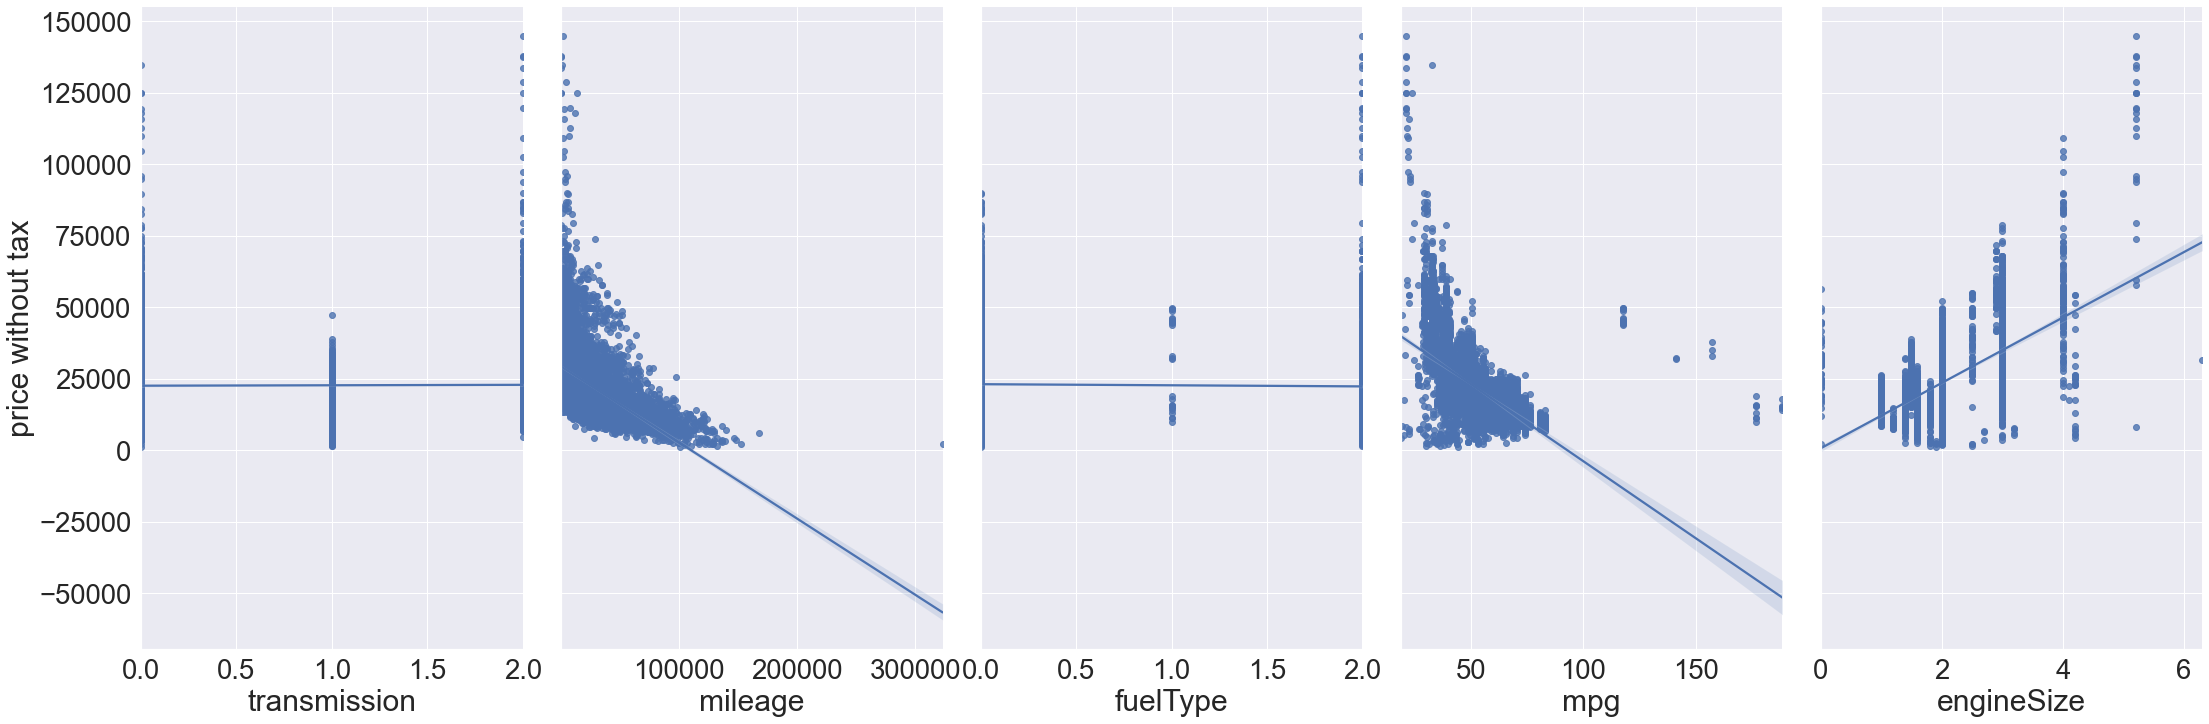

In [12]:
# It defines the font size around the graph
sns.set(font_scale=2.5)

# new_df - this is the data frame
# x_vars & y_vars - This is the columns we want to see based on the column in y_vars
# height & aspect - Determine the size of the graph. height - length, aspect - width.
# kind - This adds the linear line. 'reg' is regression
sns.pairplot(new_df, x_vars=['transmission','mileage','fuelType','mpg','engineSize'], y_vars='price without tax', height=10, aspect=0.6, kind='reg')

# Linear regression model

* split for train & test

In [13]:
X = new_df[['transmission', 'mileage', 'fuelType','mpg','engineSize']]
y = new_df['price without tax']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

* fit the model with training data

In [15]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

- Make predictions and build a new dataframe where there are two columns, one column shows the original price of the vehicle and a second column shows the price the model predicted. (Recall that it is a price in euros).

In [16]:
y_pred = lin.predict(X_test)

In [17]:
compare_df = pd.DataFrame({'Actual_price': y_test, 'Predicted_price': y_pred})
compare_df.head()

,Actual_price,Predicted_price
2049,14853,15465.217904
5609,21805,29629.150649
7638,28845,30523.488966
1603,25344,26319.036665
5953,30805,30946.254660


- ***And finally we will see in another dataframe the difference in price between them and we will see how accurate the model is by averaging the column: difference_in_price***

In [18]:
compare_df['difference_in_price'] = compare_df['Actual_price'] - compare_df['Predicted_price']
compare_df

,Actual_price,Predicted_price,difference_in_price
2049,14853,15465.217904,-612.217904
5609,21805,29629.150649,-7824.150649
7638,28845,30523.488966,-1678.488966
1603,25344,26319.036665,-975.036665
5953,30805,30946.254660,-141.254660
...,...,...,...
7682,24805,25041.112479,-236.112479
9402,9965,15226.430983,-5261.430983
743,17480,17824.237821,-344.237821
1815,28743,25144.241103,3598.758897


In [19]:
acc =compare_df['difference_in_price'].mean()
print(acc)
print(f'The accuracy is: {acc} euro difference between Actual_price and Predicted_price')

-30.24863047544527
The accuracy is: -30.24863047544527 euro difference between Actual_price and Predicted_price


## From here and below we will see the linear model based on only the three features: mileage , mpg ( miles per gallon) , engineSize

In [20]:
df_based_on_lin = new_df
df_based_on_lin.head()

,transmission,mileage,fuelType,mpg,engineSize,price without tax
0,1,15735,2,55.4,1.4,12350
1,0,36203,0,64.2,2.0,16480
2,1,29946,2,55.4,1.4,10970
3,0,25952,0,67.3,2.0,16655
4,1,1998,2,49.6,1.0,17155


In [21]:
new_df_based_on_lin = df_based_on_lin.drop(columns = ['transmission', 'fuelType'])
new_df_based_on_lin.head()

,mileage,mpg,engineSize,price without tax
0,15735,55.4,1.4,12350
1,36203,64.2,2.0,16480
2,29946,55.4,1.4,10970
3,25952,67.3,2.0,16655
4,1998,49.6,1.0,17155


In [22]:
X2 = new_df_based_on_lin[['mileage','mpg','engineSize']]
y2 = new_df_based_on_lin['price without tax']

In [23]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)

* fit the model with training data

In [24]:
lin2 = LinearRegression()
lin2.fit(X2_train, y2_train)

LinearRegression()

In [25]:
y2_pred = lin2.predict(X2_test)

In [26]:
compare_df2 = pd.DataFrame({'Actual_price': y2_test, 'Predicted_price': y2_pred})
compare_df2.head()

,Actual_price,Predicted_price
2049,14853,15397.757475
5609,21805,29700.026070
7638,28845,30635.482593
1603,25344,26366.661098
5953,30805,30961.064043


In [27]:
compare_df2['difference_in_price'] = compare_df2['Actual_price'] - compare_df2['Predicted_price']
compare_df2

,Actual_price,Predicted_price,difference_in_price
2049,14853,15397.757475,-544.757475
5609,21805,29700.026070,-7895.026070
7638,28845,30635.482593,-1790.482593
1603,25344,26366.661098,-1022.661098
5953,30805,30961.064043,-156.064043
...,...,...,...
7682,24805,25073.961601,-268.961601
9402,9965,15338.182881,-5373.182881
743,17480,17918.288377,-438.288377
1815,28743,25142.923427,3600.076573


In [28]:
acc2 = compare_df2['difference_in_price'].mean()
print(acc2)
print(f'The accuracy is: {acc2} euro difference between Actual_price and Predicted_price')

-31.393832922458014
The accuracy is: -31.393832922458014 euro difference between Actual_price and Predicted_price


- ***We see that although there is a stronger linear relationship only with these 3 features, when the model is based only on them the accuracy came out lower compared to if it was based on all the features***